<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series EDA

_Author: Unknown_

----
This lab will walk you through performing exploratory data analysis on a dataset of weekly chickenpox cases from Hungary. This dataset is from the UCI Machine Learning Repository. You can read more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Hungarian+Chickenpox+Cases).

-----

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Only using one county
pox = pd.read_csv('data/hungary_chickenpox.csv')[['Date', 'BUDAPEST']]

# Renaming columns for readability
pox.columns = ['date', 'budapest_cases']
pox.head(3)

,date,budapest_cases
0,03/01/2005,168
1,10/01/2005,157
2,17/01/2005,96


In [3]:
pox.shape

(522, 2)

**Check the dataframe dtypes**

In [4]:
pox.dtypes

date              object
budapest_cases     int64
dtype: object

**Check for nulls**

In [5]:
pox.isnull().sum()

date              0
budapest_cases    0
dtype: int64

**Casting the `'Date'` column to a datetime type**

Use `pd.to_datetime` to convert the `Date` column to a datetime.

**WARNING**: The date column is formated as day-month-year. Does `pd.to_datetime` work the way you expect it to on day/month/year strings? If it doesn't work the way you expect it to, check [the documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) for `pd.to_datetime`, and see if one of the settings fixes things.

In [6]:
pox.columns

Index(['date', 'budapest_cases'], dtype='object')

In [7]:
# weekly chickenpox cases
pox.head()

,date,budapest_cases
0,03/01/2005,168
1,10/01/2005,157
2,17/01/2005,96
3,24/01/2005,163
4,31/01/2005,122


In [8]:
pox['date'] = pd.to_datetime(pox['date'], format="%d/%m/%Y")

In [9]:
pox.head()

,date,budapest_cases
0,2005-01-03,168
1,2005-01-10,157
2,2005-01-17,96
3,2005-01-24,163
4,2005-01-31,122


In [10]:
pox.tail()

,date,budapest_cases
517,2014-12-01,95
518,2014-12-08,43
519,2014-12-15,35
520,2014-12-22,30
521,2014-12-29,259


**Set the `'Date'` column to be the index**

In [11]:
pox.set_index('date',inplace=True)

In [12]:
pox.head()

,budapest_cases
date,
2005-01-03,168
2005-01-10,157
2005-01-17,96
2005-01-24,163
2005-01-31,122


In [13]:
pox.tail()

,budapest_cases
date,
2014-12-01,95
2014-12-08,43
2014-12-15,35
2014-12-22,30
2014-12-29,259


---

Now that our data is formatted appropriately, we can embark on EDA.

### Summary statistics

**What times does the dataset describe?**

That is, what's the earliest date in the dataset, and what's the latest date?

In [14]:
date_list = list(pox.index)
print(f'Earliest date: {date_list[0]}')
print(f'Lastest date: {date_list[-1]}')

Earliest date: 2005-01-03 00:00:00
Lastest date: 2014-12-29 00:00:00


**Plot a histogram of the Budapest cases column**

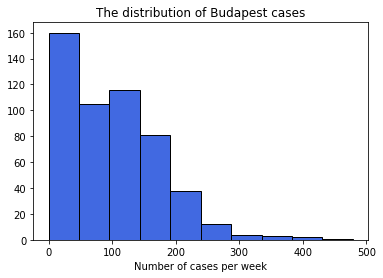

In [15]:
plt.hist(pox['budapest_cases'],
         bins=10,
         color= 'royalblue',
         edgecolor = '#000000')
plt.title('The distribution of Budapest cases')
plt.xlabel('Number of cases per week');

**How many cases were there per year?**

Recall that with time series data, we can't simply group by on the year. You'll need to use the `resample` method on the DataFrame to answer this question.

In [32]:
pox.resample('Y').mean().round(1)

,budapest_cases,cases_4w,cases_12w
date,,,
2005-12-31,87.7,85.3,82.7
2006-12-31,125.0,125.9,124.9
2007-12-31,119.1,116.9,114.2
2008-12-31,85.4,87.9,89.8
2009-12-31,106.3,106.6,108.3
2010-12-31,100.4,98.1,90.9
2011-12-31,103.9,105.4,110.2
2012-12-31,101.0,101.5,101.8
2013-12-31,99.2,100.4,102.7


### Visualizations

**Make a line plot of chickenpox cases**

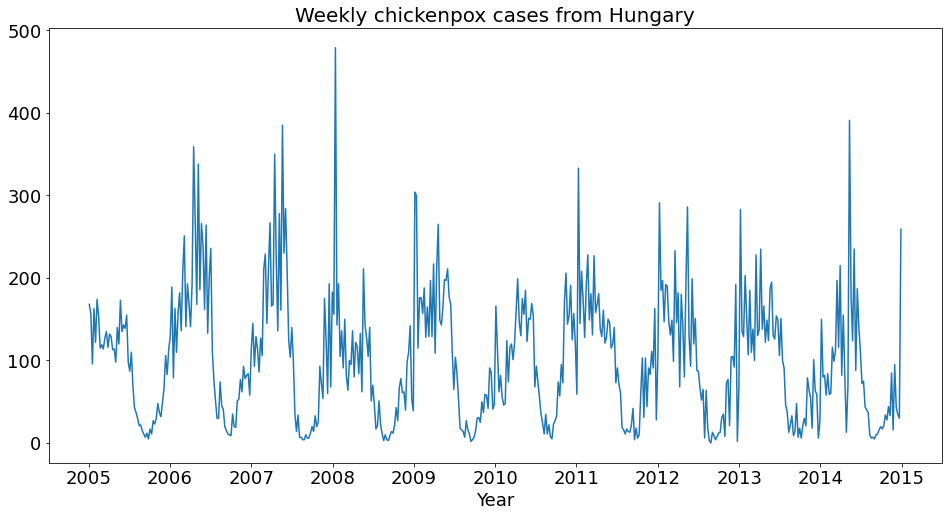

In [24]:
plt.figure(figsize=(16,8))
plt.plot(pox['budapest_cases'])
plt.title('Weekly chickenpox cases from Hungary',
         fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

**In short answer format, describe any apparent trends**

In [ ]:
# Trend: There is no trend in this time series. (No increase or decrease in data)
# Seasonality: There is seasonality in the data.

### Plot rolling averages

Plot the weekly chickenpox cases, but on the same graph, also plot the 4-week and 12-week rolling averages.

In [28]:
# rolling average 4-week
pox['cases_4w'] = pox['budapest_cases'].rolling(window=4).mean()
pox['cases_12w'] = pox['budapest_cases'].rolling(window=12).mean()
pox

,budapest_cases,cases_4w,cases_12w
date,,,
2005-01-03,168,NaN,NaN
2005-01-10,157,NaN,NaN
2005-01-17,96,NaN,NaN
2005-01-24,163,146.00,NaN
2005-01-31,122,134.50,NaN
...,...,...,...
2014-12-01,95,57.25,35.000000
2014-12-08,43,59.75,37.666667
2014-12-15,35,47.25,39.250000


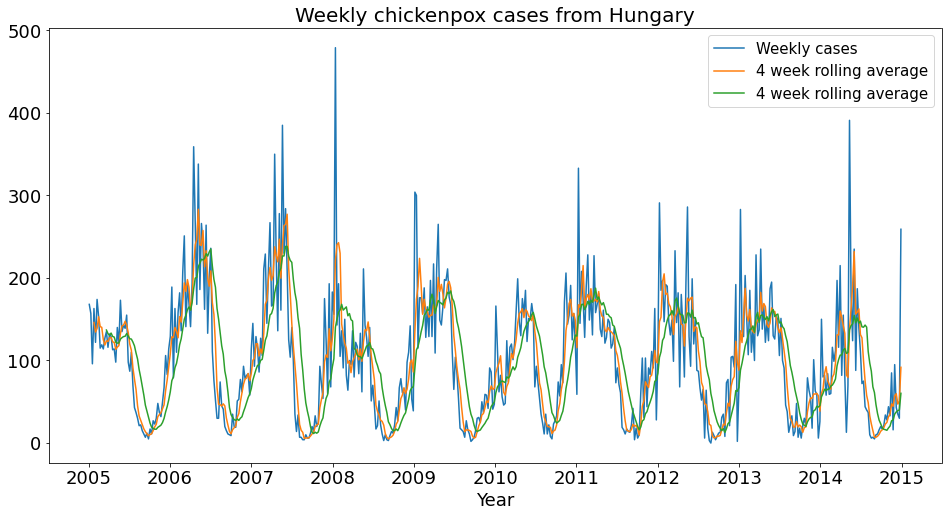

In [31]:
plt.figure(figsize=(16,8))
plt.plot(pox['budapest_cases'], label='Weekly cases')
plt.plot(pox['cases_4w'], label='4 week rolling average')
plt.plot(pox['cases_12w'], label='4 week rolling average')
plt.title('Weekly chickenpox cases from Hungary',
         fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=15);

### Plot yearly chickenpox cases

You may need to use `resample` again for this.

In [35]:
pox_yearly = pox.resample('Y').mean()
pox_yearly

,budapest_cases,cases_4w,cases_12w
date,,,
2005-12-31,87.730769,85.306122,82.670732
2006-12-31,124.961538,125.875000,124.926282
2007-12-31,119.075472,116.933962,114.235849
2008-12-31,85.403846,87.870192,89.822115
2009-12-31,106.288462,106.557692,108.286859
2010-12-31,100.423077,98.052885,90.907051
2011-12-31,103.923077,105.370192,110.205128
2012-12-31,101.000000,101.490566,101.786164
2013-12-31,99.173077,100.365385,102.741987


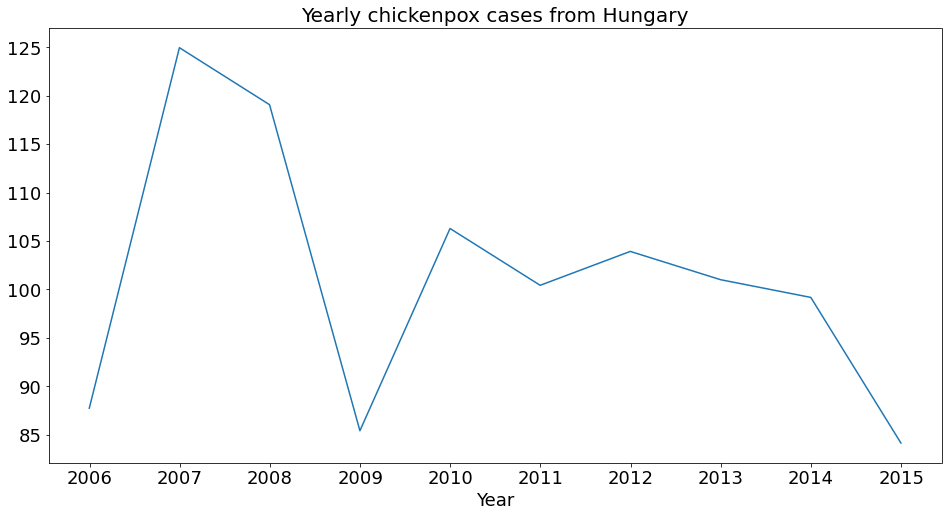

In [37]:
plt.figure(figsize=(16,8))
plt.plot(pox_yearly['budapest_cases'])
plt.title('Yearly chickenpox cases from Hungary',
         fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

In [ ]:
# After plot yealy chickenpox cases, trend of time series is changed.
# At 2006, The chickenpox cases increase. Then, the trend of the cases decrease over time. 